#  Covid Detection using XRay Dataset

In [1]:
import pandas as pd
import os
import shutil

In [2]:
print(os.listdir("./Data"))
TRAIN_PATH = "./Data/Train"
VAL_PATH = "./Data/Val"

['test', 'train']


# Building architecture

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [4]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy,optimizer = "adam",metrics=["accuracy"])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

# Data Augmentation

In [6]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
test_dataset = image.ImageDataGenerator(rescale = 1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    './Data/train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 1726 images belonging to 2 classes.


In [8]:
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [9]:
validation_generator = test_dataset.flow_from_directory(
    './Data/test',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)
validation_generator.class_indices

Found 433 images belonging to 2 classes.


{'COVID19': 0, 'NORMAL': 1}

# Model Fitting

In [10]:
hist = model.fit(
    train_generator,
    steps_per_epoch = 8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

Epoch 1/10
8/8 [==============================] - 61s 5s/step - loss: 0.6486 - accuracy: 0.6401 - val_loss: 0.6104 - val_accuracy: 0.7500
Epoch 2/10
8/8 [==============================] - 42s 5s/step - loss: 0.5124 - accuracy: 0.7917 - val_loss: 0.6481 - val_accuracy: 0.7344
Epoch 3/10
8/8 [==============================] - 42s 5s/step - loss: 0.6031 - accuracy: 0.6967 - val_loss: 0.6167 - val_accuracy: 0.6562
Epoch 4/10
8/8 [==============================] - 42s 5s/step - loss: 0.5474 - accuracy: 0.7346 - val_loss: 0.5920 - val_accuracy: 0.6719
Epoch 5/10
8/8 [==============================] - 43s 5s/step - loss: 0.4765 - accuracy: 0.7644 - val_loss: 0.5566 - val_accuracy: 0.8438
Epoch 6/10
8/8 [==============================] - 42s 5s/step - loss: 0.3989 - accuracy: 0.8475 - val_loss: 0.2440 - val_accuracy: 0.8750
Epoch 7/10
8/8 [==============================] - 44s 5s/step - loss: 0.3088 - accuracy: 0.8911 - val_loss: 0.2500 - val_accuracy: 0.9062
Epoch 8/10
8/8 [==================

# Confusion Matrix

In [11]:
y_actual = []
y_test = []

for i in os.listdir("./Data/test/COVID19"):
  img = image.load_img("./Data/test/COVID19/"+i,target_size=(224,224,3))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

for i in os.listdir("./Data/test/NORMAL"):
  img = image.load_img("./Data/test/NORMAL/"+i,target_size=(224,224,3))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

C:\Users\asus\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [12]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [13]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
class_names = ["Covid-19","Normal"]

cm = confusion_matrix(y_actual,y_test)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap="plasma"):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 93  23]
 [  2 315]]


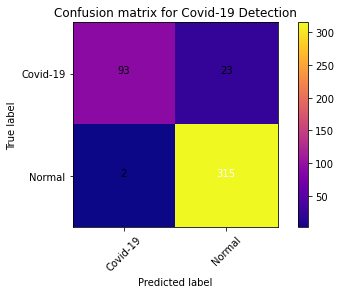

In [14]:
plt.figure()
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix for Covid-19 Detection',cmap="plasma")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


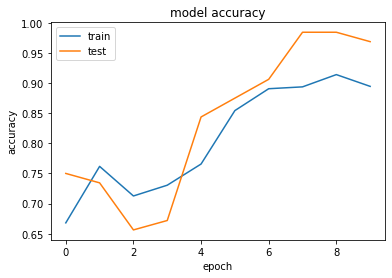

In [15]:
history = hist
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

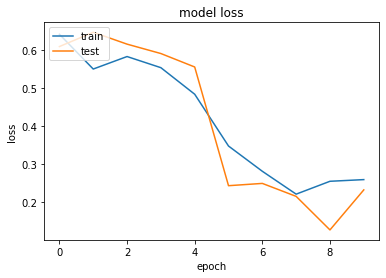

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

C:\Users\asus\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


This Xray Image is of positive covid-19 patient
Prediction Of Our Model :  Positive For Covid-19


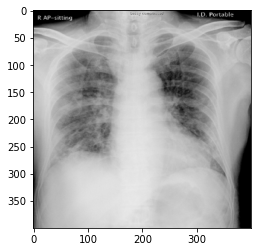

In [16]:
import numpy as np
# from google.colab.patches import cv2_imshow
import cv2
from keras.preprocessing import image
xtest_image = image.load_img('./Dataset/Prediction/ryct.2020200034.fig5-day7.jpeg', target_size = (224, 224,3))
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
results = model.predict_classes(xtest_image)
# training_set.class_indices
imggg = cv2.imread('./Dataset/Prediction/ryct.2020200034.fig5-day7.jpeg')
print("This Xray Image is of positive covid-19 patient")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))
plt.imshow(imggg)
# cv2_imshow(imggg)
# print(results)
if results[0][0] == 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_actual, y_test))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88       116
           1       0.93      0.99      0.96       317

    accuracy                           0.94       433
   macro avg       0.96      0.90      0.92       433
weighted avg       0.94      0.94      0.94       433

